## Hyperparameter Tunning


# Import Libraries

In [ ]:
import pandas as pd
import numpy as np

# Import Dataset

In [ ]:
telco = pd.read_csv ('/content/churn.csv')

In [ ]:
telco.head(5)

,customerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0.0,NaN,No,1.0,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.0,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0.0,No,No,2.0,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0.0,No,No,45.0,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0.0,No,No,2.0,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7046 entries, 0 to 7045
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7037 non-null   object 
 1   Gender            7030 non-null   object 
 2   SeniorCitizen     7034 non-null   float64
 3   Partner           7030 non-null   object 
 4   Dependents        7027 non-null   object 
 5   Tenure            7029 non-null   float64
 6   Contract          7033 non-null   object 
 7   PaperlessBilling  7033 non-null   object 
 8   PaymentMethod     7035 non-null   object 
 9   MonthlyCharges    7036 non-null   float64
 10  TotalCharges      7046 non-null   float64
 11  Churn             7046 non-null   object 
dtypes: float64(4), object(8)
memory usage: 660.7+ KB


# Data Cleaning

# Missing Value

In [ ]:
import string
telco[telco.isin(list(string.whitespace))].count().sum()

0

In [ ]:
telco.isnull().sum()

customerID           9
Gender              16
SeniorCitizen       12
Partner             16
Dependents          19
Tenure              17
Contract            13
PaperlessBilling    13
PaymentMethod       11
MonthlyCharges      10
TotalCharges         0
Churn                0
dtype: int64

In [ ]:
# missing value dalam bentuk percent
(100.00 * telco.isnull().sum()) / telco.shape[0]

customerID          0.127732
Gender              0.227079
SeniorCitizen       0.170309
Partner             0.227079
Dependents          0.269657
Tenure              0.241272
Contract            0.184502
PaperlessBilling    0.184502
PaymentMethod       0.156117
MonthlyCharges      0.141924
TotalCharges        0.000000
Churn               0.000000
dtype: float64

In [ ]:
# Melakukan drop row pada kolom yang terdapat missing value
telco.dropna(inplace = True)
telco.isnull().sum()

customerID          0
Gender              0
SeniorCitizen       0
Partner             0
Dependents          0
Tenure              0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6911 entries, 1 to 7045
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        6911 non-null   object 
 1   Gender            6911 non-null   object 
 2   SeniorCitizen     6911 non-null   float64
 3   Partner           6911 non-null   object 
 4   Dependents        6911 non-null   object 
 5   Tenure            6911 non-null   float64
 6   Contract          6911 non-null   object 
 7   PaperlessBilling  6911 non-null   object 
 8   PaymentMethod     6911 non-null   object 
 9   MonthlyCharges    6911 non-null   float64
 10  TotalCharges      6911 non-null   float64
 11  Churn             6911 non-null   object 
dtypes: float64(4), object(8)
memory usage: 701.9+ KB


# Duplicate

In [ ]:
telco.duplicated().sum()

13

In [ ]:
# Mencari duplicate row
emp_id = telco["customerID"]
telco[emp_id.isin(emp_id[emp_id.duplicated()])].sort_values(["customerID"])

,customerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7039,2236-HILPA,Male,0.0,Yes,Yes,62.0,Two year,No,Credit card (automatic),20.65,1218.45,No
5915,2236-HILPA,Male,0.0,Yes,Yes,62.0,Two year,No,Credit card (automatic),20.65,1218.45,No
6567,2342-CKIAO,Female,0.0,No,No,2.0,Month-to-month,No,Mailed check,20.30,41.20,No
7040,2342-CKIAO,Female,0.0,No,No,2.0,Month-to-month,No,Mailed check,20.30,41.20,No
7032,2905-KFQUV,Female,0.0,Yes,No,2.0,Month-to-month,Yes,Credit card (automatic),70.40,154.80,No
5835,2905-KFQUV,Female,0.0,Yes,No,2.0,Month-to-month,Yes,Credit card (automatic),70.40,154.80,No
3478,2921-XWDJH,Female,1.0,Yes,No,38.0,Month-to-month,Yes,Electronic check,83.45,3147.15,No
7044,2921-XWDJH,Female,1.0,Yes,No,38.0,Month-to-month,Yes,Electronic check,83.45,3147.15,No
7045,3604-WLABM,Female,0.0,No,No,10.0,Month-to-month,No,Electronic check,54.25,583.00,No
3652,3604-WLABM,Female,0.0,No,No,10.0,Month-to-month,No,Electronic check,54.25,583.00,No


In [ ]:
# Mengatasi Duplicate row
print(f"Data Frame Dimension Before Duplicate Removal: {telco.shape}")
telco = telco.drop_duplicates()
print(f"Data Frame Dimension After Duplicate Removal: {telco.shape}")

Data Frame Dimension Before Duplicate Removal: (6911, 12)
Data Frame Dimension After Duplicate Removal: (6898, 12)


# Multicollinearity


In [ ]:
telco['Churn'] = telco['Churn'].map(lambda s :1  if s =='Yes' else 0)
telco['Churn'].value_counts()

0    5073
1    1825
Name: Churn, dtype: int64

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
   
# the independent variables set
X = telco[['SeniorCitizen','MonthlyCharges', 'TotalCharges', 'Tenure', 'Churn']]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


          feature       VIF
0   SeniorCitizen  1.271895
1  MonthlyCharges  5.723782
2    TotalCharges  8.694420
3          Tenure  6.379805
4           Churn  1.763036


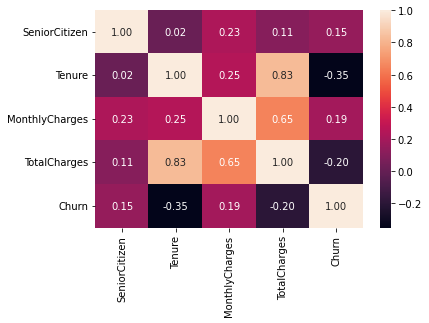

In [ ]:
import seaborn as sns
correlation = telco.corr()
sns.heatmap(correlation, annot=True, fmt='.2f')

`TotalCharges` dan `Tenure` saling berkorelasi tinggi
karena `TotalCharges` memiliki korelasi lebih rendan dengan `Churn` sebesar -0,20 maka kolom `TotalCharges` di drop

In [ ]:
telco_clean_multicol = telco.drop(columns=['TotalCharges'])

In [ ]:
telco_clean_multicol.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6898 entries, 1 to 7031
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        6898 non-null   object 
 1   Gender            6898 non-null   object 
 2   SeniorCitizen     6898 non-null   float64
 3   Partner           6898 non-null   object 
 4   Dependents        6898 non-null   object 
 5   Tenure            6898 non-null   float64
 6   Contract          6898 non-null   object 
 7   PaperlessBilling  6898 non-null   object 
 8   PaymentMethod     6898 non-null   object 
 9   MonthlyCharges    6898 non-null   float64
 10  Churn             6898 non-null   int64  
dtypes: float64(3), int64(1), object(7)
memory usage: 646.7+ KB


# Handle Categorical Data

In [ ]:
telco_clean_multicol.Contract.unique()

array(['One year', 'Month-to-month', 'Two year'], dtype=object)

Handle with binary

In [ ]:
telco_clean_multicol['Dependents'] = telco_clean_multicol['Dependents'].map(lambda s :1  if s =='Yes' else 0)
telco_clean_multicol['Partner'] = telco_clean_multicol['Partner'].map(lambda s :1  if s =='Yes' else 0)
telco_clean_multicol['PaperlessBilling'] = telco_clean_multicol['PaperlessBilling'].map(lambda s :1  if s =='Yes' else 0)

In [ ]:
telco_clean_multicol['Gender'] = telco_clean_multicol['Gender'].map(lambda s :1  if s =='Female' else 0)

handle with dummies

In [ ]:
telco_clean_multicol = pd.get_dummies(data=telco_clean_multicol, columns=['PaymentMethod'])

In [ ]:
telco_clean_multicol = pd.get_dummies(data=telco_clean_multicol, columns=['Contract'])

# Choose Matirx fit with the model

In [ ]:
telco_clean_multicol.head(5)

,customerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PaperlessBilling,MonthlyCharges,Churn,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year
1,5575-GNVDE,0,0.0,0,0,34.0,0,56.95,0,0,0,0,1,0,1,0
2,3668-QPYBK,0,0.0,0,0,2.0,1,53.85,1,0,0,0,1,1,0,0
3,7795-CFOCW,0,0.0,0,0,45.0,0,42.30,0,1,0,0,0,0,1,0
4,9237-HQITU,1,0.0,0,0,2.0,1,70.70,1,0,0,1,0,1,0,0
5,9305-CDSKC,1,0.0,0,0,8.0,1,99.65,1,0,0,1,0,1,0,0


In [ ]:
telco_drop = telco_clean_multicol.drop(columns=['customerID'])

In [ ]:
# split the data 
from sklearn.model_selection import train_test_split

X = telco_drop.drop(columns='Churn').to_numpy()
y = telco_drop[['Churn']].to_numpy()
y = y.reshape(len(y),) # sklean formatting

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
# define random forest classifier model
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42)

# Hyperparameters Tunning with GridSearchCV dan RandomSearchCV

In [ ]:
%%time
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_estimators': (10,20,30,40,50),
    'max_depth':(1,2,3,4,5)
}

# note: we use recall
rf_clf_gridcv = GridSearchCV(rf_clf, parameters, cv=5, scoring='recall')
rf_clf_gridcv.fit(X_train, y_train)

CPU times: user 12 s, sys: 66.6 ms, total: 12 s
Wall time: 12.2 s


In [ ]:
cv_result = pd.DataFrame(rf_clf_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
20,"{'max_depth': 5, 'n_estimators': 10}",0.391638,1
15,"{'max_depth': 4, 'n_estimators': 10}",0.368641,2
21,"{'max_depth': 5, 'n_estimators': 20}",0.368641,3
23,"{'max_depth': 5, 'n_estimators': 40}",0.367944,4
24,"{'max_depth': 5, 'n_estimators': 50}",0.367247,5
22,"{'max_depth': 5, 'n_estimators': 30}",0.365157,6
16,"{'max_depth': 4, 'n_estimators': 20}",0.329617,7
17,"{'max_depth': 4, 'n_estimators': 30}",0.314983,8
19,"{'max_depth': 4, 'n_estimators': 50}",0.314286,9
18,"{'max_depth': 4, 'n_estimators': 40}",0.312195,10


In [ ]:
%%time
# using random search CV
from sklearn.model_selection import RandomizedSearchCV

parameters = {
    'n_estimators': (10,20,30,40,50),
    'max_depth':(1,2,3,4,5)
}

rf_clf_randomcv = RandomizedSearchCV(rf_clf, parameters, cv=5, 
                                     scoring='recall', n_iter=10)
rf_clf_randomcv.fit(X_train, y_train)

CPU times: user 4.26 s, sys: 21.5 ms, total: 4.28 s
Wall time: 4.85 s


In [ ]:
# results of RandomSearchCV
cv_result = pd.DataFrame(rf_clf_randomcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
4,"{'n_estimators': 10, 'max_depth': 5}",0.391638,1
3,"{'n_estimators': 10, 'max_depth': 4}",0.368641,2
1,"{'n_estimators': 20, 'max_depth': 5}",0.368641,3
6,"{'n_estimators': 30, 'max_depth': 5}",0.365157,4
0,"{'n_estimators': 40, 'max_depth': 4}",0.312195,5
2,"{'n_estimators': 20, 'max_depth': 3}",0.239024,6
8,"{'n_estimators': 10, 'max_depth': 3}",0.238328,7
5,"{'n_estimators': 20, 'max_depth': 1}",0.000000,8
7,"{'n_estimators': 40, 'max_depth': 2}",0.000000,8
9,"{'n_estimators': 10, 'max_depth': 1}",0.000000,8


# Evaluation Matrix

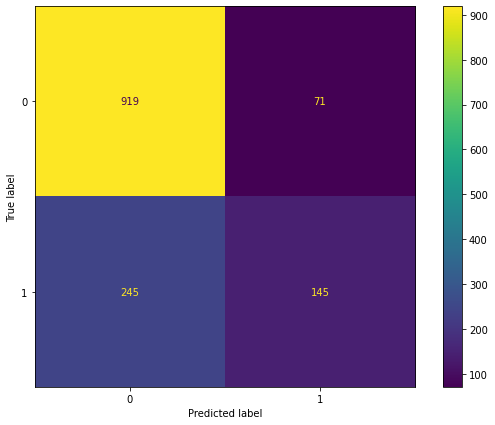

In [ ]:
# the confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10,7))
y_pred = rf_clf_gridcv.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=rf_clf_gridcv.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf_clf_gridcv.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

953 itu posisinya di positive false

# Classification 

In [ ]:
# classification report
from sklearn.metrics import classification_report
y_pred = rf_clf_gridcv.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.93      0.85       990
           1       0.67      0.37      0.48       390

    accuracy                           0.77      1380
   macro avg       0.73      0.65      0.67      1380
weighted avg       0.76      0.77      0.75      1380



Dari 390 data yang benar - benar melakukan churn, random forest hanya bisa mendeteksi 37% dari keseluruhan data yang melakukan churn


# Hyperparameter with K-Nearest Neighbors Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()

In [ ]:
# hyperparameter tuning
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_neighbors': (2,3,4,5,6,7,8)
}

knn_clf_gridcv = GridSearchCV(knn_clf, parameters, cv=5, scoring='recall')
knn_clf_gridcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': (2, 3, 4, 5, 6, 7, 8)},
             scoring='recall')

In [ ]:
# the compact results
cv_result = pd.DataFrame(knn_clf_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols]

,params,mean_test_score,rank_test_score
0,{'n_neighbors': 2},0.321254,7
1,{'n_neighbors': 3},0.516376,1
2,{'n_neighbors': 4},0.374216,6
3,{'n_neighbors': 5},0.502439,2
4,{'n_neighbors': 6},0.413937,5
5,{'n_neighbors': 7},0.500348,3
6,{'n_neighbors': 8},0.418815,4


In [ ]:
# what if we also want to tune "weights" hyperparameter
# "uniform": standard measurement tidak ada perbedaan bobot dari tetangga yg kita tanyain jadinya bobotnya sama 
# "distance": closer neighbor has stronger influence memiliki bobot yg berbeda 
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_neighbors': (2,3,4,5,6,7,8),
    'weights':('uniform','distance')
}

# now we use recall (sensitivity) as metric
knn_clf_gridcv = GridSearchCV(knn_clf, parameters, cv=5, scoring='recall')
knn_clf_gridcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': (2, 3, 4, 5, 6, 7, 8),
                         'weights': ('uniform', 'distance')},
             scoring='recall')

In [ ]:
# the results
cv_result = pd.DataFrame(knn_clf_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
2,"{'n_neighbors': 3, 'weights': 'uniform'}",0.516376,1
3,"{'n_neighbors': 3, 'weights': 'distance'}",0.511498,2
1,"{'n_neighbors': 2, 'weights': 'distance'}",0.507317,3
5,"{'n_neighbors': 4, 'weights': 'distance'}",0.505923,4
6,"{'n_neighbors': 5, 'weights': 'uniform'}",0.502439,5
9,"{'n_neighbors': 6, 'weights': 'distance'}",0.502439,6
7,"{'n_neighbors': 5, 'weights': 'distance'}",0.501045,7
11,"{'n_neighbors': 7, 'weights': 'distance'}",0.501045,7
10,"{'n_neighbors': 7, 'weights': 'uniform'}",0.500348,9
13,"{'n_neighbors': 8, 'weights': 'distance'}",0.500348,9


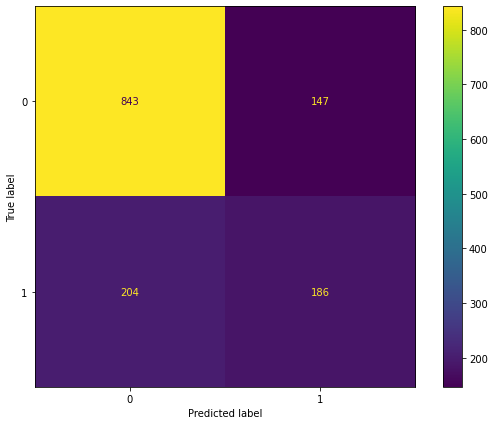

In [ ]:
# plotting confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10,7))
y_pred = knn_clf_gridcv.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=knn_clf_gridcv.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=knn_clf_gridcv.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

In [ ]:
# classification report
from sklearn.metrics import classification_report
y_pred = knn_clf_gridcv.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       990
           1       0.56      0.48      0.51       390

    accuracy                           0.75      1380
   macro avg       0.68      0.66      0.67      1380
weighted avg       0.74      0.75      0.74      1380



setelah dilakukan hyperparameter dengan `GridSearchCV dan RandomSearchCV` dan `K-Nearest Neighbors Classifier` tidak didapatkan hasil yang optimal pada matrix recall dibawah 50 % pada tingkat customer yang melakukan churn. sehingga dilakukan handle pada imbalanced data untuk mendapatkan hasil yang optimal 



# BALANCED DATA WITH SMOTE 

In [ ]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))
  
# import SMOTE module from imblearn library
# pip install imblearn (if you don't have imblearn in your system)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 1435
Before OverSampling, counts of label '0': 4083 

After OverSampling, the shape of train_X: (8166, 14)
After OverSampling, the shape of train_y: (8166,) 

After OverSampling, counts of label '1': 4083
After OverSampling, counts of label '0': 4083


In [ ]:
sm = SMOTE(random_state=42)

X = telco_drop.drop(['Churn'],axis = 1)
Y = telco_drop['Churn']
X_sm, y_sm = sm.fit_resample(X, Y)

print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_sm.shape}''')

print('\nBalance of positive and negative classes (%):')
y_sm.value_counts(normalize=True) * 100

Shape of X before SMOTE: (6898, 14)
Shape of X after SMOTE: (10146, 14)

Balance of positive and negative classes (%):


0    50.0
1    50.0
Name: Churn, dtype: float64

In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.25, random_state=42)

# K-NN With Balanced Data

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()

In [ ]:
# hyperparameter tuning
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_neighbors': (2,3,4,5,6,7,8)
}

knn_clf_gridcv = GridSearchCV(knn_clf, parameters, cv=5, scoring='recall')
knn_clf_gridcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': (2, 3, 4, 5, 6, 7, 8)},
             scoring='recall')

In [ ]:
# the results
cv_result = pd.DataFrame(knn_clf_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
1,{'n_neighbors': 3},0.903686,1
3,{'n_neighbors': 5},0.887200,2
5,{'n_neighbors': 7},0.869404,3
4,{'n_neighbors': 6},0.827265,4
2,{'n_neighbors': 4},0.827004,5
6,{'n_neighbors': 8},0.824650,6
0,{'n_neighbors': 2},0.778589,7


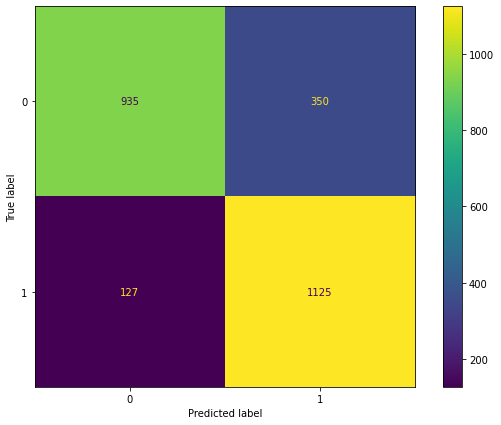

In [ ]:
# plotting confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10,7))
y_pred = knn_clf_gridcv.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=knn_clf_gridcv.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=knn_clf_gridcv.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

935 Jumlah data berlabel sebenarnya `tidak churn` dan diklasifikasi oleh model sebagai label `tidak churn`. Disebut dengan `True Negative` dengan 350 jumlah data berlabel sebenernya `tidak churn` tetapi diklasifikasi oleh model sebagai label `churn`. Disebut dengan ` False Positif` dan keduanya jika digabungkan menjadi matriks `Specifity`  atau mendeteksi data pada yang tidak churn dengan benar. 

In [ ]:
# classification report
from sklearn.metrics import classification_report
y_pred = knn_clf_gridcv.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.73      0.80      1285
           1       0.76      0.90      0.83      1252

    accuracy                           0.81      2537
   macro avg       0.82      0.81      0.81      2537
weighted avg       0.82      0.81      0.81      2537



Setelah dilakukan `balanced data` dan hyperparameter menggunakan `K-Nearest Neighbors Classifier` didapatkan hasil yang lebih optimal.
Dari 1252 data yang melakukan churn, `K-Nearest Neighbors Classifier` berhasil mendeteksi 90% dari keseluruhan data yang melakukan churn. sehingga model terbaik adalah KNN dengan balanced data.
